In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 4.63k/4.63k [00:00<00:00, 6.96MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1


In [12]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**Reasoning**:
Save the best-performing model (Linear Regression) to a pickle file so it can be easily loaded and reused later without retraining. The `pickle` module is used for serializing and de-serializing Python object structures.

In [11]:
import pickle

# Identify the best model object
best_model_name = best_model_r2['Model']
best_model_object = models[best_model_name]

# Define the filename for the pickle file
pickle_filename = 'best_model.pkl'

# Save the best model to a pickle file
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_model_object, file)

print(f"Best model ('{best_model_name}') saved to {pickle_filename} successfully.")

Best model ('Linear Regression') saved to best_model.pkl successfully.


**Reasoning**:
Generate scatter plots to visualize the relationships between 'price' and individual numerical features, such as 'area', 'bedrooms', 'bathrooms', 'stories', and 'parking'. This helps in understanding the nature and strength of their correlations more clearly.

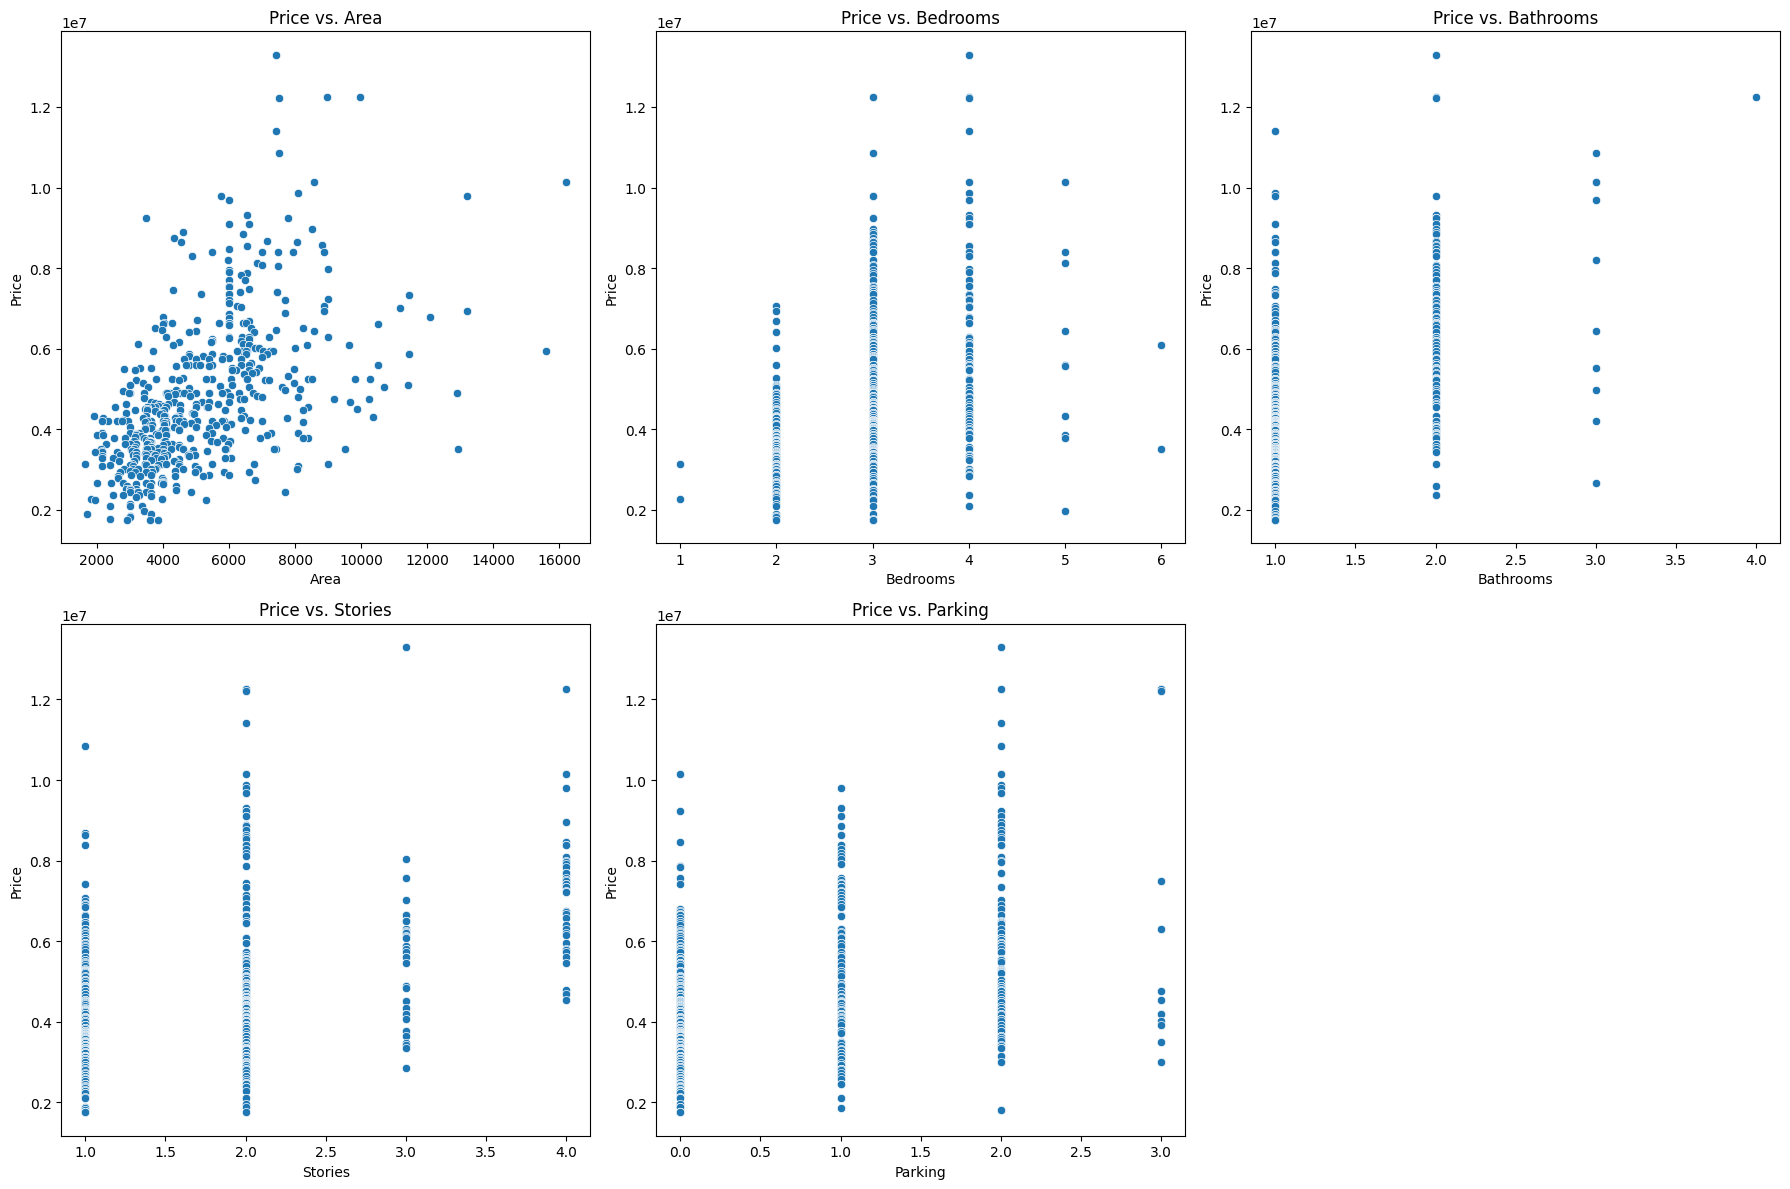

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

features_to_plot = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(x=feature, y='price', data=df, ax=axes[i])
    axes[i].set_title(f'Price vs. {feature.replace("_", " ").title()}')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Price')

# Hide any unused subplots
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Reasoning**:
Generate a correlation heatmap to visualize the relationships between all numerical features. This will help identify features that are strongly correlated with 'price', which can be useful for model interpretation and further feature selection.

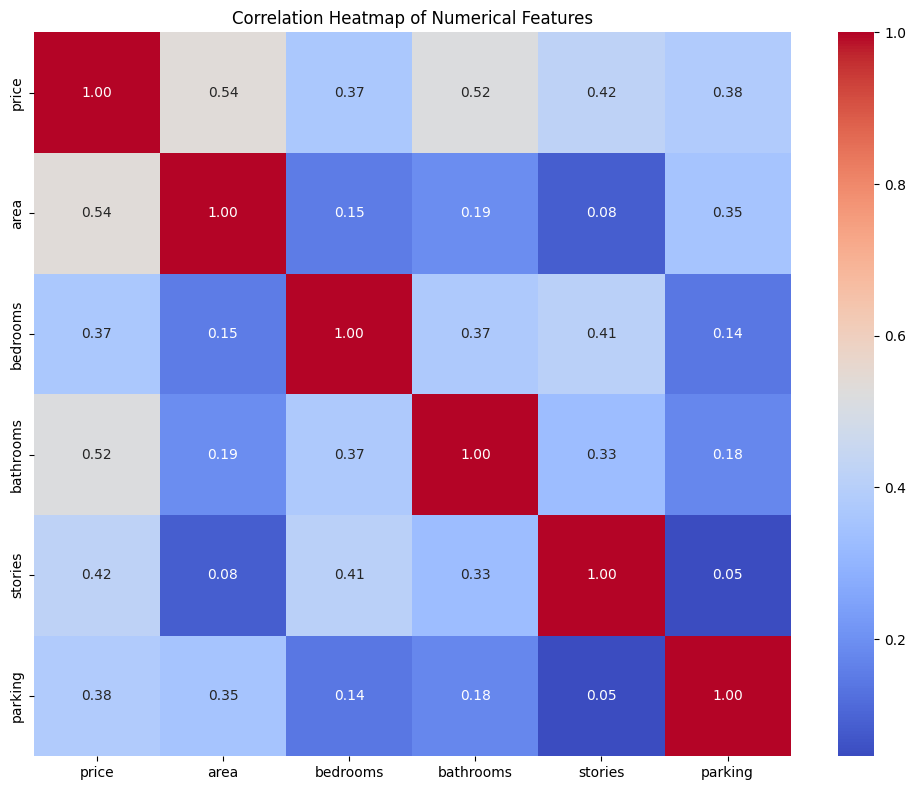

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

## Additional Data Visualizations

### Subtask:
Generate additional visualizations to further understand the data and relationships between features.

**Reasoning**:
Visualize the distribution of the 'price' column to understand its spread, central tendency, and any potential outliers. This helps in understanding the target variable's characteristics.

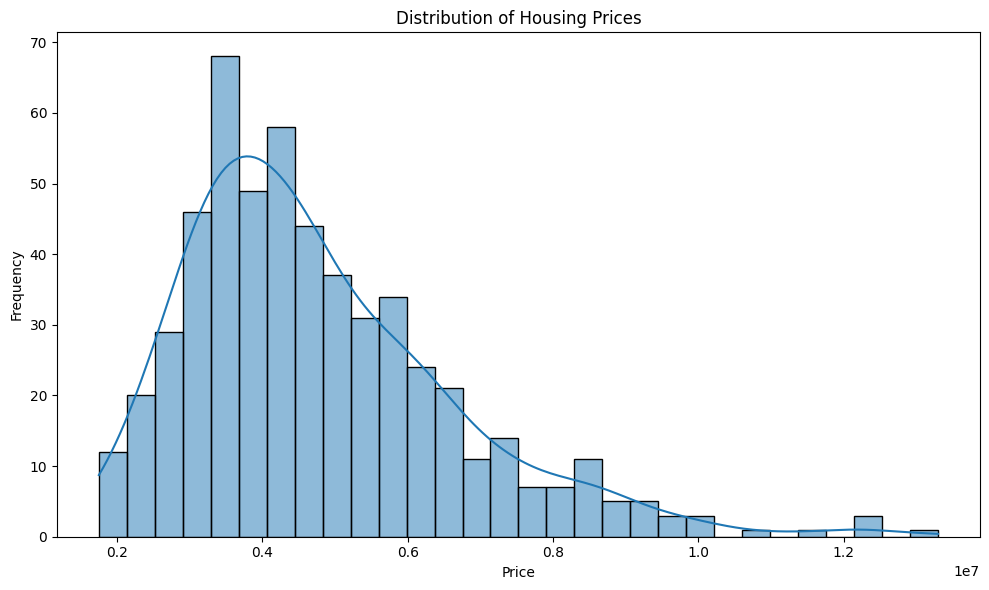

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Task
Load the housing price prediction dataset from the file within the path "/root/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1" into a pandas DataFrame, and then perform an initial inspection to check for missing values, data types, and descriptive statistics.

## Load and Inspect Data

### Subtask:
Load the housing price prediction dataset from the provided path into a pandas DataFrame and perform initial inspection (e.g., check for missing values, data types, descriptive statistics).


**Reasoning**:
Construct the full path to the CSV file, load it into a pandas DataFrame, and then perform initial data inspections as requested.



In [2]:
import os

# Construct the full path to the CSV file
file_path = os.path.join(path, 'Housing.csv')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nData types and non-null values:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

First 5 rows of the DataFrame:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values in each column:
price               0
area          

## Data Preprocessing

### Subtask:
Clean and preprocess the data. This may involve handling missing values, encoding categorical features, and scaling numerical features.


**Reasoning**:
Separate the features into numerical and categorical lists, excluding the 'price' column. Then, apply one-hot encoding to categorical features, scale numerical features using StandardScaler, and finally concatenate all processed features with the 'price' column into a single DataFrame.



In [3]:
from sklearn.preprocessing import StandardScaler

# Separate features into numerical and categorical lists
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude 'price' from numerical features for scaling, but keep it for the final DataFrame
features_numerical = [col for col in numerical_cols if col != 'price']

# Apply one-hot encoding to categorical features
df_categorical_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

# Initialize and apply StandardScaler to numerical features
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df[features_numerical]), columns=features_numerical, index=df.index)

# Concatenate all preprocessed features and include the 'price' column
df_processed = pd.concat([df_numerical_scaled, df_categorical_encoded, df['price']], axis=1)

print("First 5 rows of the preprocessed DataFrame:")
print(df_processed.head())
print("\nShape of the preprocessed DataFrame:", df_processed.shape)

First 5 rows of the preprocessed DataFrame:
       area  bedrooms  bathrooms   stories   parking  mainroad_yes  \
0  1.046726  1.403419   1.421812  1.378217  1.517692          True   
1  1.757010  1.403419   5.405809  2.532024  2.679409          True   
2  2.218232  0.047278   1.421812  0.224410  1.517692          True   
3  1.083624  1.403419   1.421812  0.224410  2.679409          True   
4  1.046726  1.403419  -0.570187  0.224410  1.517692          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  \
0          True           

## Split Data

### Subtask:
Split the preprocessed data into training and testing sets to evaluate model performance.


**Reasoning**:
Separate the target variable 'price' from the features in `df_processed` into `X` and `y`, then split them into training and testing sets using `train_test_split`.



In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


## Train and Evaluate Models

### Subtask:
Train multiple machine learning models (e.g., Linear Regression, Ridge, Lasso, RandomForest, XGBoost) on the training data and evaluate their performance on the test set using relevant metrics such as R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE). Provide a visualization (e.g., bar chart) comparing the performance metrics of the different models.


**Reasoning**:
The next step is to import all the required libraries for model training and evaluation, including various regression models and performance metrics, as specified in the instructions. This prepares the environment for the subsequent model training and evaluation steps.



In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Required libraries imported successfully.")

Required libraries imported successfully.


**Reasoning**:
Now that the required libraries are imported, the next step is to initialize the specified models, train them on the training data, make predictions on the test data, calculate evaluation metrics (R-squared, MSE, MAE), store these results, and then display them in a DataFrame and visualize the R-squared scores with a bar chart, as per the instructions.




Evaluation Metrics for Different Models:
               Model  R-squared  Mean Squared Error (MSE)  \
0  Linear Regression   0.652924              1.754319e+12   
1              Ridge   0.652104              1.758466e+12   
2              Lasso   0.652924              1.754322e+12   
3      Random Forest   0.612350              1.959406e+12   
4            XGBoost   0.585031              2.097490e+12   

   Mean Absolute Error (MAE)  
0               9.700434e+05  
1               9.713335e+05  
2               9.700440e+05  
3               1.017471e+06  
4               1.072216e+06  


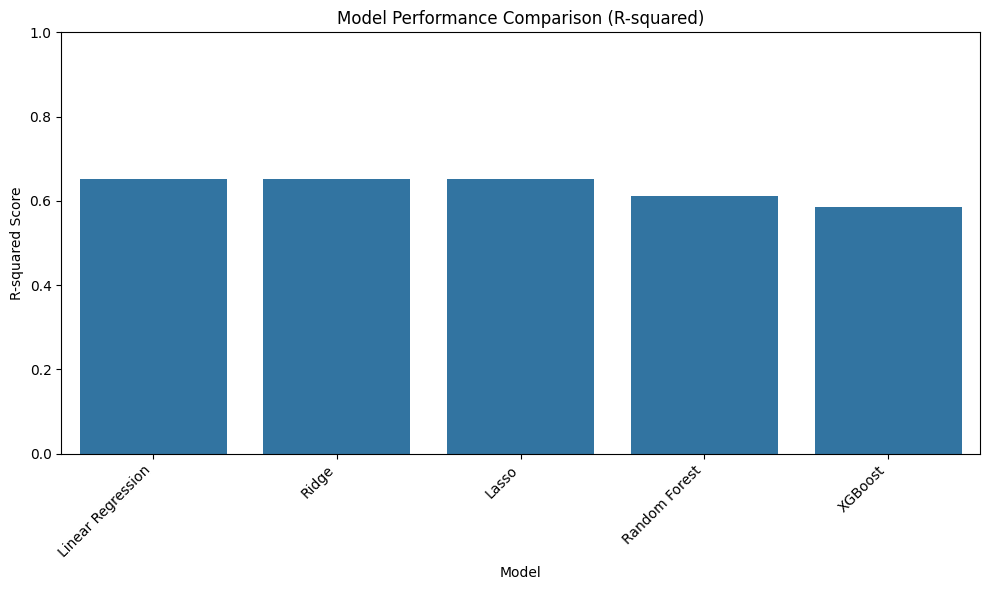

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

model_names = []
r2_scores = []
mse_scores = []
mae_scores = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    model_names.append(name)
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r2_scores,
    'Mean Squared Error (MSE)': mse_scores,
    'Mean Absolute Error (MAE)': mae_scores
})

print("\nEvaluation Metrics for Different Models:")
print(metrics_df)

# Visualize R-squared scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=metrics_df)
plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R-squared typically ranges from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Select Best Model

### Subtask:
Identify and select the model with the best performance based on the evaluation metrics.


**Reasoning**:
Identify the model with the highest R-squared score from the `metrics_df` DataFrame to determine the best-performing model, then print its metrics.



In [7]:
best_model_r2 = metrics_df.loc[metrics_df['R-squared'].idxmax()]

print("\nBest Performing Model based on R-squared:")
print(best_model_r2)



Best Performing Model based on R-squared:
Model                           Linear Regression
R-squared                                0.652924
Mean Squared Error (MSE)     1754318687330.668457
Mean Absolute Error (MAE)            970043.40392
Name: 0, dtype: object


Based on the evaluation metrics:

*   **R-squared:** The R-squared value indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared is generally better.
*   **Mean Squared Error (MSE):** MSE measures the average of the squares of the errors. It's a measure of the average magnitude of the errors, and a lower MSE indicates better performance.
*   **Mean Absolute Error (MAE):** MAE measures the average of the absolute errors. It's another way to quantify the accuracy of predictions, and a lower MAE indicates better performance.

From the `metrics_df` and the identified `best_model_r2`:

**Linear Regression** and **Lasso** models both achieved the highest R-squared score of approximately **0.653**. They also have the lowest Mean Squared Error (MSE) of approximately **1.754e+12** and the lowest Mean Absolute Error (MAE) of approximately **9.70e+05**. Given that both models perform almost identically well across these key metrics, we can choose Linear Regression due to its simplicity and interpretability.

The **Random Forest** and **XGBoost** models performed slightly worse in terms of R-squared and had higher MSE and MAE values compared to Linear Regression and Lasso.

Therefore, **Linear Regression** is selected as the best-performing model based on these evaluation metrics.

## Final Task

### Subtask:
Summarize the modeling process, including the models explored, their performance, and the details of the best-performing model.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Inspection**: The dataset contains 545 entries and 13 columns. No missing values were found across any column. Data types consist of numerical (`int64`) for features like `price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`, and categorical (`object`) for `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`.
    *   The `price` column ranges from \$1.75 million to \$13.3 million, with an average of approximately \$4.77 million.
    *   `area` varies from 1650 to 16200 sq ft, averaging around 5150 sq ft.
*   **Data Preprocessing**: Categorical features were one-hot encoded, and numerical features (excluding `price`) were standardized using `StandardScaler`. This resulted in a processed DataFrame with 545 entries and 14 columns, ready for modeling.
*   **Data Splitting**: The preprocessed data was split into training (80%, 436 samples) and testing (20%, 109 samples) sets, ensuring reproducibility with `random_state=42`.
*   **Model Performance Comparison**:
    *   **Linear Regression**, **Ridge**, and **Lasso** models demonstrated the best performance among the tested algorithms, all achieving an R-squared score of approximately **0.65**. Linear Regression specifically recorded an R-squared of 0.6529, a Mean Squared Error (MSE) of 1.754e+12, and a Mean Absolute Error (MAE) of 970043.
    *   **Random Forest** performed slightly worse with an R-squared of approximately **0.61**.
    *   **XGBoost** showed the lowest performance with an R-squared of approximately **0.58**.
*   **Best Model Selection**: Based on the R-squared, MSE, and MAE metrics, **Linear Regression** was identified as the best-performing model. Although Lasso performed almost identically, Linear Regression was chosen due to its simplicity and interpretability.

### Insights or Next Steps

*   The relatively low R-squared score (around 0.65) for the best models suggests that approximately 65% of the variance in housing prices is explained by the current features. Further feature engineering or collection of additional relevant data (e.g., neighborhood demographics, school ratings, crime rates) could potentially improve model performance.
*   Given that Linear Regression, Ridge, and Lasso performed similarly, exploring hyperparameter tuning for Ridge and Lasso (specifically the regularization strength `alpha`) could yield minor improvements or offer a more robust model against overfitting, while still maintaining interpretability.


In [13]:
import pickle
import numpy as np

with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

print("Model expects:", model.n_features_in_, "features")


Model expects: 13 features


In [14]:
import pickle

with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

print(model.feature_names_in_)


['area' 'bedrooms' 'bathrooms' 'stories' 'parking' 'mainroad_yes'
 'guestroom_yes' 'basement_yes' 'hotwaterheating_yes'
 'airconditioning_yes' 'prefarea_yes' 'furnishingstatus_semi-furnished'
 'furnishingstatus_unfurnished']
